<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/Early_Stoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

In [6]:
X

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

In [7]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

<Axes: >

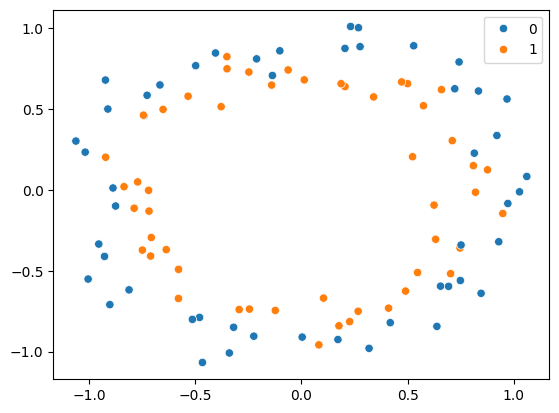

In [8]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [10]:
model=Sequential()

model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

In [ ]:
# As you can see that its overfiting after around 300 epochs so we have to apply early stoping to prevent overfiting
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 14s 1ms/step


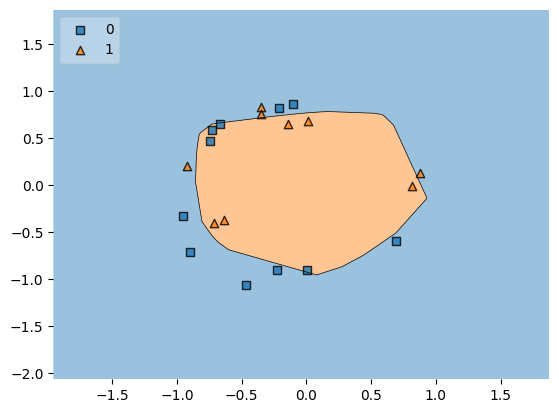

In [14]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# Early Stopping

In [15]:
model=Sequential()

model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
    )

In [18]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 100ms/step - loss: 0.6939 - accuracy: 0.4625 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6913 - accuracy: 0.4875 - val_loss: 0.6867 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 26ms/step - loss: 0.6906 - accuracy: 0.4875 - val_loss: 0.6878 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6892 - accuracy: 0.4875 - val_loss: 0.6886 - val_accuracy: 0.5500
Epoch 5/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6886 - accuracy: 0.4875 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 6/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6876 - accuracy: 0.4875 - val_loss: 0.6924 - val_accuracy: 0.5500
Epoch 7/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6866 - accuracy: 0.4875 - val_loss: 0.6944 - val_accuracy: 0.5500
Epoch 8/3500

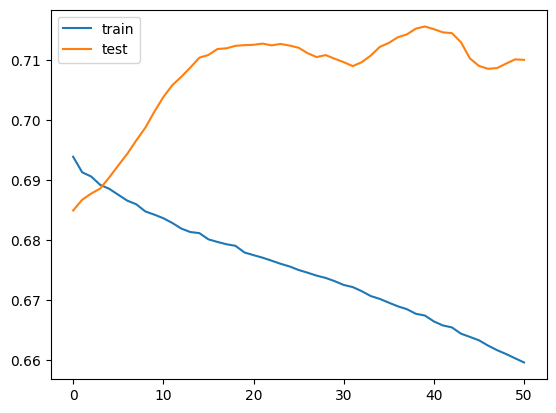

In [19]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 14s 1ms/step


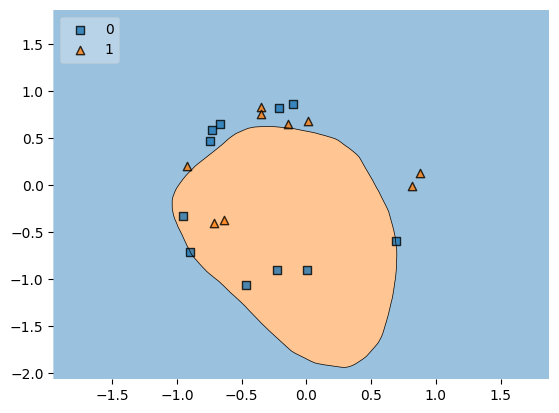

In [20]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()